In [57]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import graphviz

## 데이터 셋 설명

- date : Date and Timestampe (170303 ~ 170909)

- (flotation cell(부선기) =  부유선광 공정에서 광석안에 있는 추출하고자 하는 금속성 광물을 띄워 올려 추출하는 장비)

- % Iron Feed : % of Iron that comes from the iron ore that is being fed into the flotation cells

- % Silica Feed : % of silica (impurity) that comes from the iron ore that is being fed into the flotation cells

- Starch Flow : (포수제로 사용) Starch (reagent) Flow measured in m3/h

(포수제 = 광물입자와 기포와의 기계적 운동이나 역학적 포획작용을 주는 것이 아니고 광물표면을 소수성으로 만들어 주는 시약)

- Anima Flow : (기포제로 사용) Amina (reagent) Flow measured in m3/h

(기포제 = 액체(보통 물)에 녹여, 거품의 생성을 촉진하는 물질)

(Ore Pulp = 분쇄한 광석에 적당량의 물을 더해 유동 상태 혹은 현탁 상태로 한 것, 광석류를 파이프 수송할 경우에 사용)

- Ore Pulp Flow : tone / hour

- Ore Pulp pH : pH scale from 0 to 14

- Ore Pulp Density : Density scale from 1 to 3 kg/cm³

(1 Nm³ = (760/P) ((T+273)/298) m³)

- Flotation Column Air Flow : Air flow that goes into the flotation cell measured in Nm³/h

- Flotation Column Level : Froth level in the flotation cell measured in mm (millimeters)

- % Iron Concentrate : % of Iron which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

- % Silica Concentrate : % of silica which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

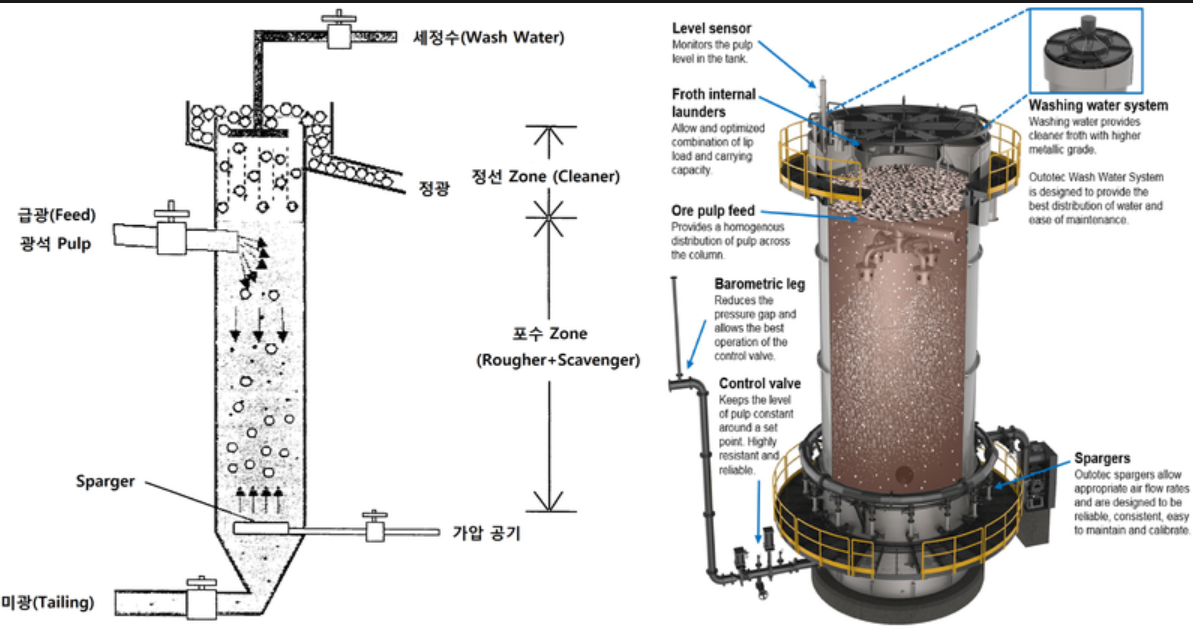

In [2]:
Image("C:/Users/hhhwa/Desktop/p_picture/ore_1.png")

## Data Loading

In [3]:
df = pd.read_csv("C:/Users/hhhwa/Desktop/ex_data/MiningProcess_Flotation_Plant_Database.csv",decimal=",",index_col='date',parse_dates=["date"],
                 infer_datetime_format=True).drop_duplicates()

In [4]:
df.columns = ['b_Iron','b_Silica','Starch_Flow','Anima_Flow','Ore_Pulp_Flow','Ore_Pulp_pH','Ore_Pulp_Density',
             'air_1','air_2','air_3','air_4','air_5','air_6','air_7','froth_1','froth_2','froth_3','froth_4','froth_5','froth_6','froth_7',
             'a_Iron', 'a_Silica']

In [5]:
df

,b_Iron,b_Silica,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_1,air_2,air_3,...,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,299.163,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,299.487,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,299.487,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71


## Multicollinearity

In [6]:
from patsy import *
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
y, X = dmatrices('a_Silica ~ b_Iron + b_Silica + Starch_Flow + Anima_Flow + Ore_Pulp_Flow + Ore_Pulp_pH + Ore_Pulp_Density + air_1 + air_2 + air_3 + air_4 + air_5 + air_6 + air_7 + froth_1 + froth_2 + froth_3 + froth_4 + froth_5 + froth_6 + froth_7',data=df, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,41235.9,Intercept
1,19.3,b_Iron
2,19.1,b_Silica
3,1.3,Starch_Flow
4,2.2,Anima_Flow
5,1.2,Ore_Pulp_Flow
6,1.2,Ore_Pulp_pH
7,2.0,Ore_Pulp_Density
8,12.3,air_1
9,4.3,air_2


In [8]:
df.drop(['b_Iron', 'b_Silica','air_1','air_3'], axis='columns', inplace=True)

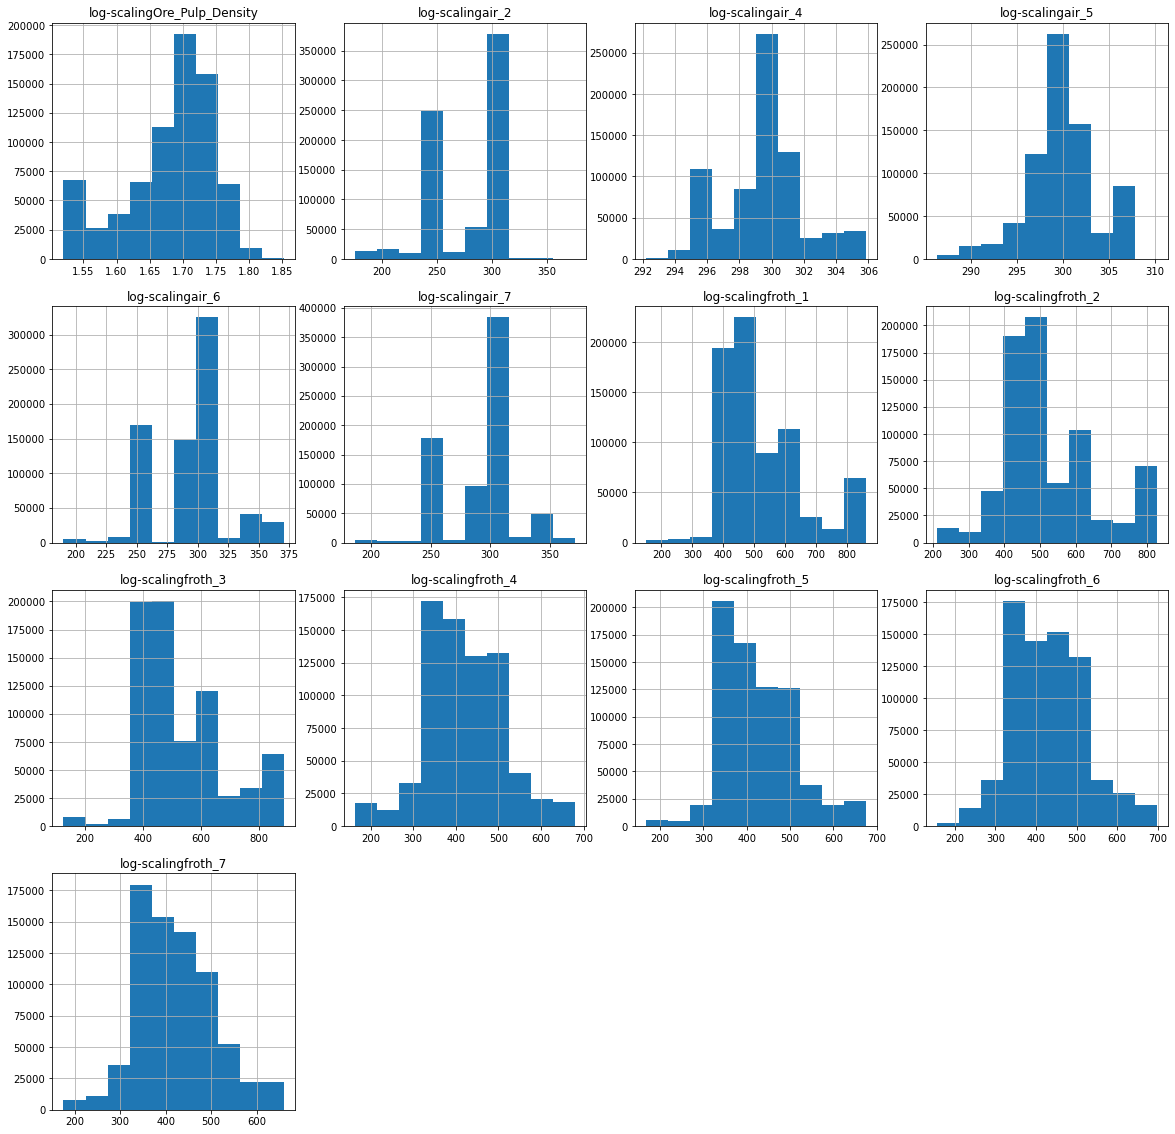

In [9]:
## 변수들 분포 확인

plt.figure(figsize=(20,20))
for i in range(4,17):
    plt.subplot(4,4,i-3)
    plt.title('log-scaling'+df.columns[i])
    df.iloc[:,i].hist()

In [10]:
## Transform to normal distribution
cols = df.columns.tolist()
    
for i in cols:
    df[i] = (df[i]-df[i].mean())/df[i].std()

In [11]:
df

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
date,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,0.123266,0.759070,-0.191412,0.772479,0.860854,-0.792060,-1.690189,1.783104,-1.383562,-1.389187,-0.478865,-0.698767,-0.704489,0.254897,0.913367,0.183280,1.206534,1.663420,-0.903745
2017-03-10 01:00:00,0.127279,0.830639,-0.019343,0.774545,0.860854,-0.881690,-1.690189,1.783104,-1.386472,-1.455063,-0.520860,-0.725300,-0.651584,0.304245,0.843622,0.178298,0.908899,1.663420,-0.903745
2017-03-10 01:00:00,0.142945,0.875448,0.216091,0.776611,0.860854,-0.969829,-1.690189,1.783104,-1.346526,-1.487234,-0.525827,-0.418264,-0.640513,0.321704,0.702143,0.199472,0.443547,1.663420,-0.903745
2017-03-10 01:00:00,0.146152,0.882143,0.037944,0.778936,0.860854,-0.750544,-1.690189,1.783104,-1.377047,-1.380021,-0.516665,-0.502201,-0.585819,0.283799,0.548259,0.086750,0.079609,1.663420,-0.903745
2017-03-10 01:00:00,0.134910,0.767102,0.276470,0.781002,0.860854,-0.828502,-1.690189,1.783104,-1.391564,-1.457363,-0.516665,-0.543264,-0.535081,0.365102,0.443937,0.153387,0.056169,1.663420,-0.903745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 23:00:00,-0.130505,-0.516288,-1.133460,-0.377154,-0.386874,0.718396,0.184079,-0.080235,1.809717,0.800072,-0.976524,-0.716394,2.257470,-0.015746,0.857649,0.183136,-0.047330,-0.696417,-0.548384
2017-09-09 23:00:00,-0.146072,-0.161412,-1.301510,-0.378859,-0.388753,0.820959,0.102488,0.151274,1.255145,-1.883567,-0.905234,-0.919847,2.207123,-0.019538,0.962408,-0.632727,0.063920,-0.696417,-0.548384
2017-09-09 23:00:00,-0.145916,0.135034,-1.450190,-0.383740,-0.390776,1.003934,0.186799,-0.057139,1.240827,-2.260730,-0.848829,-0.961183,2.228252,-0.006961,0.927086,-1.043761,0.143932,-0.696417,-0.548384


In [12]:
df_mean = df.copy()
mean_grpby = df_mean.groupby(['date']).mean()

In [13]:
mean_grpby

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
date,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,0.240941,0.993060,0.121852,0.894096,0.709973,-0.891834,-1.690189,1.783104,-1.350245,-1.412743,-0.532358,-0.590124,-0.535402,0.324148,0.363375,0.383607,0.348914,1.663420,-0.903745
2017-03-10 02:00:00,0.216789,0.537554,0.237092,0.936078,-0.182639,-0.892234,-1.690189,1.783104,-1.393995,-1.423569,-0.540066,-0.563937,-0.538008,0.328688,0.279696,0.284832,0.358984,1.797502,-1.081425
2017-03-10 03:00:00,0.501511,1.136835,0.122928,0.725997,0.755528,-0.895877,-1.690189,1.783104,-1.382994,-1.403123,-0.535493,-0.559107,-0.532571,0.337592,0.308238,0.334652,0.346134,1.717053,-0.939281
2017-03-10 04:00:00,0.294732,1.150679,0.236594,0.390776,0.731614,-0.892542,-1.690189,1.783104,-1.396784,-1.414505,-0.245852,-0.242506,-0.290837,0.810395,0.835348,0.810439,0.871971,1.520400,-0.859325
2017-03-10 05:00:00,0.376347,1.441522,0.210640,-0.054977,1.234800,-0.894009,-1.690189,1.783104,-1.382748,-1.417258,0.220185,0.213919,0.120424,1.414687,1.472765,1.454708,1.523708,1.413134,-0.877093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,0.376155,0.099126,-1.723109,-1.526823,-0.282529,0.764260,0.196182,0.002568,1.441484,0.278704,-0.933639,-0.185639,-0.844254,-0.231476,0.921851,-0.338309,-0.239705,0.000808,-0.601688
2017-09-09 20:00:00,1.115250,0.227916,-1.695734,-0.980882,0.167215,0.757585,0.200971,0.012384,1.855311,0.448189,-0.917260,-0.178654,-0.875065,-0.220178,0.905904,-0.344580,-0.240568,-0.195845,-0.548384
2017-09-09 21:00:00,-0.050511,0.324185,-1.700729,0.010233,0.797951,0.752071,0.161430,0.003254,1.896645,0.666943,-0.917010,-0.172134,-0.393928,-0.220572,0.889317,-0.311275,-0.239742,-0.678539,-0.468428


In [14]:
## 첫날이 01시 부터 시작되어 00시를 하나 만들어서 추가해준다.(일마다 24개의 데이터를 만들기 위해)
pd_ts = pd.Timestamp(2017, 3, 10, 0, 0, 0)

copy = []
tmp = mean_grpby.columns.tolist()

for i in range(len(tmp)):
    copy.append(mean_grpby.iloc[0,i])

    
test_df = pd.DataFrame(index=range(0), columns=tmp)    
test_df.loc[pd_ts] = copy

In [15]:
df_2 = pd.concat([test_df, mean_grpby])

In [16]:
df_2

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
2017-03-10 00:00:00,0.240941,0.993060,0.121852,0.894096,0.709973,-0.891834,-1.690189,1.783104,-1.350245,-1.412743,-0.532358,-0.590124,-0.535402,0.324148,0.363375,0.383607,0.348914,1.663420,-0.903745
2017-03-10 01:00:00,0.240941,0.993060,0.121852,0.894096,0.709973,-0.891834,-1.690189,1.783104,-1.350245,-1.412743,-0.532358,-0.590124,-0.535402,0.324148,0.363375,0.383607,0.348914,1.663420,-0.903745
2017-03-10 02:00:00,0.216789,0.537554,0.237092,0.936078,-0.182639,-0.892234,-1.690189,1.783104,-1.393995,-1.423569,-0.540066,-0.563937,-0.538008,0.328688,0.279696,0.284832,0.358984,1.797502,-1.081425
2017-03-10 03:00:00,0.501511,1.136835,0.122928,0.725997,0.755528,-0.895877,-1.690189,1.783104,-1.382994,-1.403123,-0.535493,-0.559107,-0.532571,0.337592,0.308238,0.334652,0.346134,1.717053,-0.939281
2017-03-10 04:00:00,0.294732,1.150679,0.236594,0.390776,0.731614,-0.892542,-1.690189,1.783104,-1.396784,-1.414505,-0.245852,-0.242506,-0.290837,0.810395,0.835348,0.810439,0.871971,1.520400,-0.859325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,0.376155,0.099126,-1.723109,-1.526823,-0.282529,0.764260,0.196182,0.002568,1.441484,0.278704,-0.933639,-0.185639,-0.844254,-0.231476,0.921851,-0.338309,-0.239705,0.000808,-0.601688
2017-09-09 20:00:00,1.115250,0.227916,-1.695734,-0.980882,0.167215,0.757585,0.200971,0.012384,1.855311,0.448189,-0.917260,-0.178654,-0.875065,-0.220178,0.905904,-0.344580,-0.240568,-0.195845,-0.548384
2017-09-09 21:00:00,-0.050511,0.324185,-1.700729,0.010233,0.797951,0.752071,0.161430,0.003254,1.896645,0.666943,-0.917010,-0.172134,-0.393928,-0.220572,0.889317,-0.311275,-0.239742,-0.678539,-0.468428
2017-09-09 22:00:00,0.264684,0.047622,-1.764549,0.038241,0.523374,0.748023,0.193473,0.006104,1.902954,0.505883,-0.919756,-0.186722,2.020736,-0.214857,0.891483,-0.302339,-0.225458,-0.714294,-0.326283


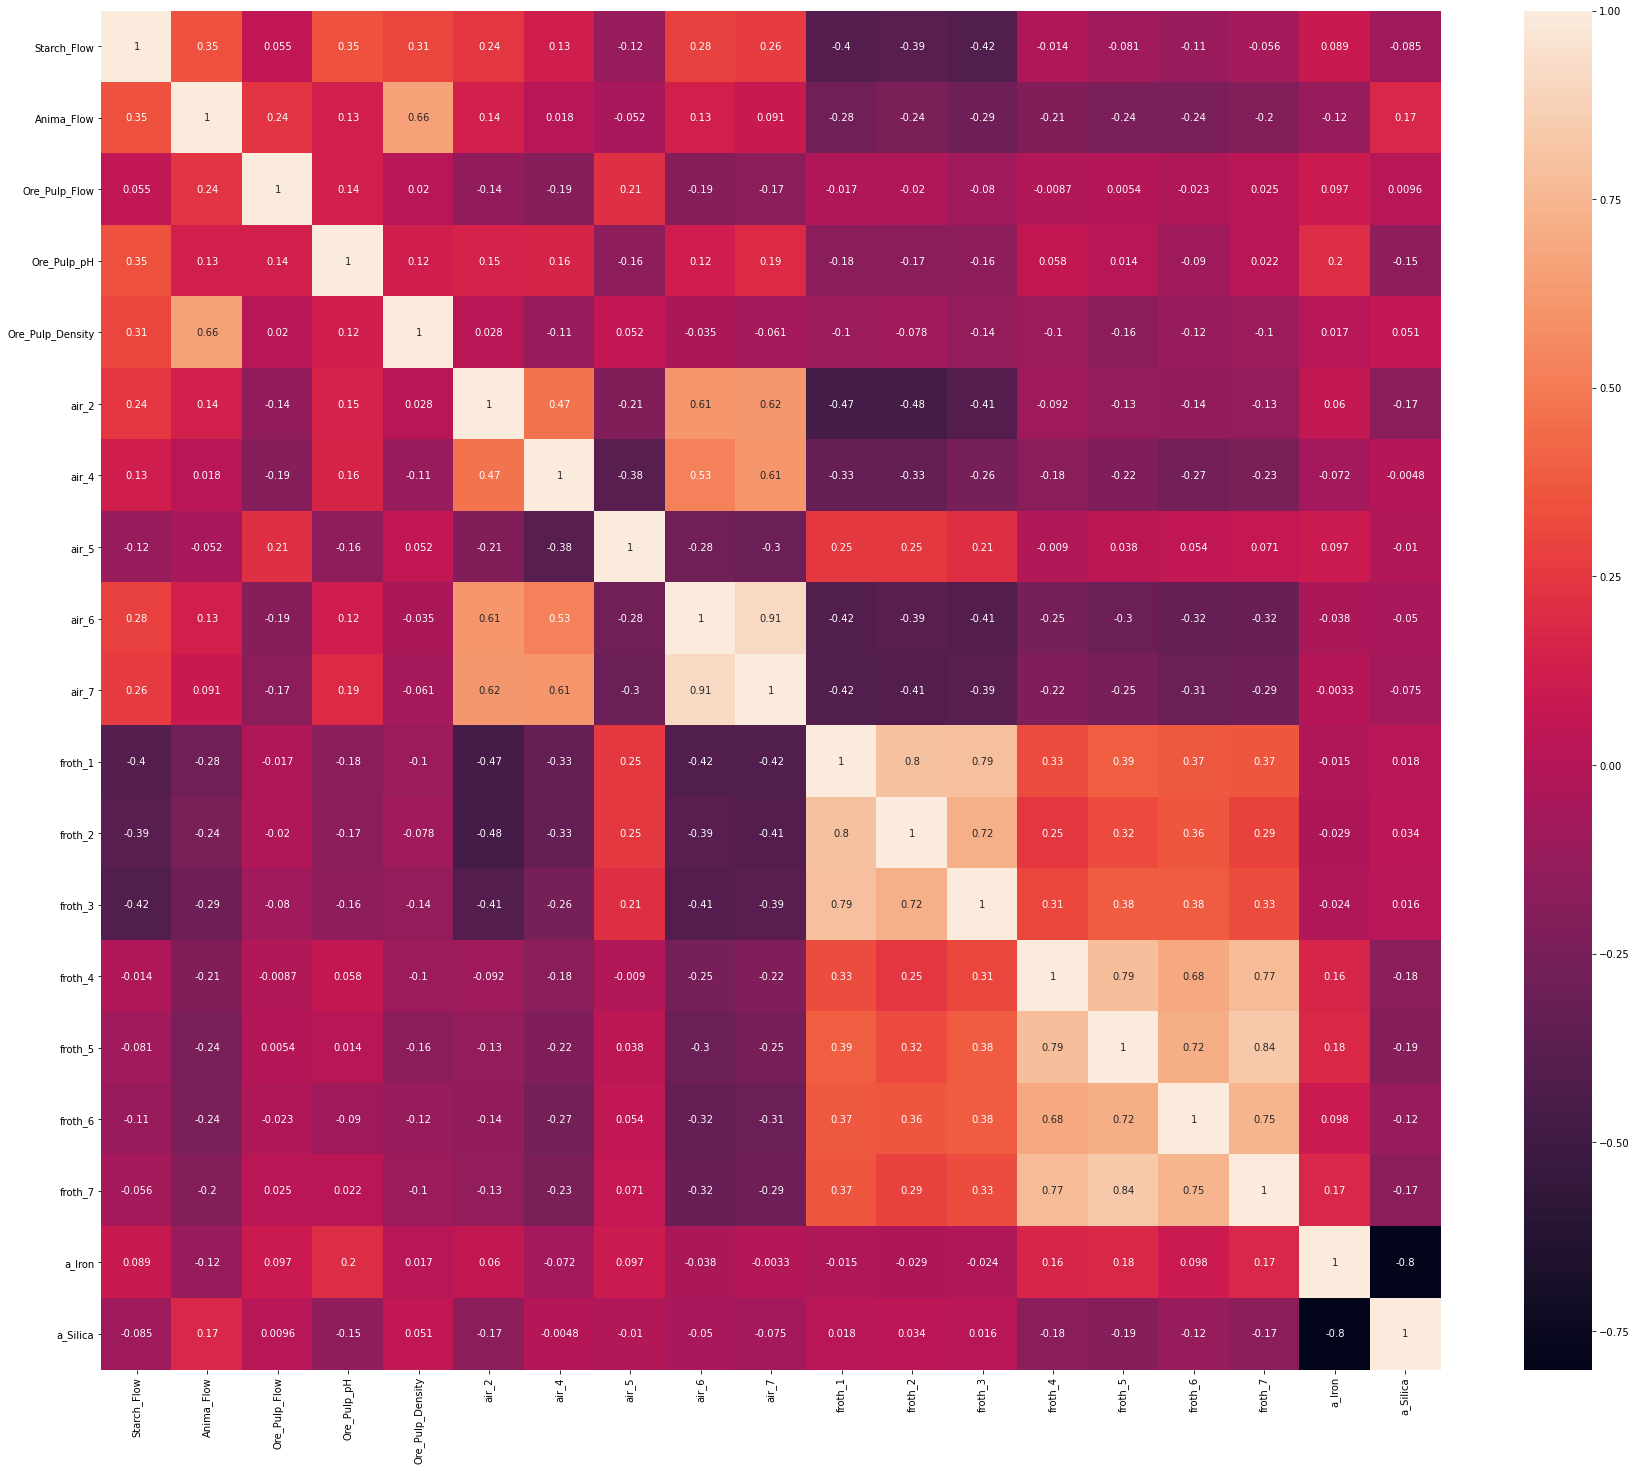

In [17]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df_2.corr(), annot=True)

In [18]:
X,y = df_2.iloc[:,0:-2], df_2.iloc[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

m_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# Make constant value
beta0 = m_reg.intercept_

# Make other coefficients of independent variables
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5+ {} x6+ {} x7 + {} x8 + {} x9 + {} x10 + {}x11 + {} x12 + {} x13 + {} x14 + {} x15 + {} x16+ {} x17'.format(round(beta0,3),
                                                                                                                  round(beta1[0],3),
                                                                                                                  round(beta1[1],3),
                                                                                                                  round(beta1[2],3),
                                                                                                                  round(beta1[3],3),
                                                                                                                  round(beta1[4],3), 
                                                                                                                  round(beta1[5],3), 
                                                                                                                  round(beta1[6],3), 
                                                                                                                  round(beta1[7],3),                                                                                                                                             
                                                                                                                  round(beta1[8],3),
                                                                                                                  round(beta1[9],3),
                                                                                                                  round(beta1[10],3),
                                                                                                                  round(beta1[11],3), 
                                                                                                                  round(beta1[12],3), 
                                                                                                                  round(beta1[13],3), 
                                                                                                                  round(beta1[14],3),                                                                                                                  
                                                                                                                  round(beta1[15],3),
                                                                                                                  round(beta1[16],3)))

y = -0.01 + -0.077 x1 + 0.324 x2 + -0.051 x3 + -0.12 x4 + -0.131 x5+ -0.223 x6+ 0.073 x7 + -0.036 x8 + 0.011 x9 + -0.023 x10 + 0.028x11 + 0.003 x12 + -0.003 x13 + -0.044 x14 + -0.179 x15 + 0.057 x16+ -0.02 x17


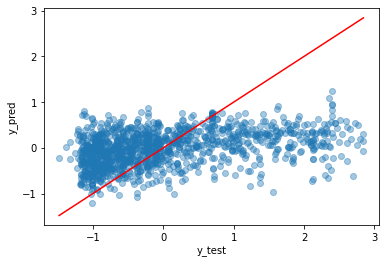

In [22]:
y_predict = m_reg.predict(X_test)
plt.scatter(y_test,y_predict, alpha=0.4)
line = np.linspace(min(y_test.values), max(y_test.values), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [23]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_predict)))
print('R2 score : {0:.3f}'.format(m_reg.score(X_train, y_train)))

MSE : 0.888, RMSE : 0.942
Variance score : 0.135
R2 score : 0.141


In [24]:
import statsmodels.api as sm 
X1 = sm.add_constant(X_train)
reg = sm.OLS(y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               a_Silica   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     27.47
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           1.77e-81
Time:                        09:27:49   Log-Likelihood:                -3831.9
No. Observations:                2868   AIC:                             7700.
Df Residuals:                    2850   BIC:                             7807.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0097      0.017     -0.560      0.576      -0.044       0.024
Starch_Flow         -0.0772      0.028     -2.773      0.006      -0.132      -0.023
Anima_Flow           0.3245      0.028     11.396      0.000       0.269       0.380
Ore_Pulp_Flow       -0.0511      0.023     -2.240      0.025      -0.096      -0.006
Ore_Pulp_pH         -0.1203      0.020     -5.990      0.000      -0.160      -0.081
Ore_Pulp_Density    -0.1306      0.027     -4.803      0.000      -0.184      -0.077
air_2               -0.2227      0.025     -8.802      0.000      -0.272      -0.173
air_4                0.0728      0.025      2.883      0.004       0.023       0.122
air_5               -0.0361      0.022     -1.642      0.101      -0.079       0.007
air_6                0.0107      0.046      0.231      0.817      -0.080       0.101
air_7               -0.0228      0.049     -0.461      0.645      -0.120       0.074
froth_1              0.0277      0.038      0.736      0.462      -0.046       0.102
froth_2              0.0033      0.034      0.098      0.922      -0.063       0.070
froth_3             -0.0028      0.033     -0.083      0.934      -0.068       0.063
froth_4             -0.0440      0.039     -1.119      0.263      -0.121       0.033
froth_5             -0.1787      0.042     -4.264      0.000      -0.261      -0.097
froth_6              0.0566      0.035      1.621      0.105      -0.012       0.125
froth_7             -0.0201      0.043     -0.467      0.640      -0.104       0.064
==============================================================================
Omnibus:                      312.633   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.074
Skew:                           0.928   Prob(JB):                     3.67e-92
Kurtosis:                       3.283   Cond. No.                         8.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Reset data in quarters a day

In [25]:
idx_list = df_2.index.tolist()

## 인덱스 6개씩 묶은 리스트 만들기 

result_q = []
for i in range(0,4098,6):
    tmp = []
    for j in range(0,6):
        tmp.append(idx_list[j])
    result_q.append(tmp)
    idx_list = idx_list[6:]

In [26]:
result_q

[[Timestamp('2017-03-10 00:00:00'),
  Timestamp('2017-03-10 01:00:00'),
  Timestamp('2017-03-10 02:00:00'),
  Timestamp('2017-03-10 03:00:00'),
  Timestamp('2017-03-10 04:00:00'),
  Timestamp('2017-03-10 05:00:00')],
 [Timestamp('2017-03-10 06:00:00'),
  Timestamp('2017-03-10 07:00:00'),
  Timestamp('2017-03-10 08:00:00'),
  Timestamp('2017-03-10 09:00:00'),
  Timestamp('2017-03-10 10:00:00'),
  Timestamp('2017-03-10 11:00:00')],
 [Timestamp('2017-03-10 12:00:00'),
  Timestamp('2017-03-10 13:00:00'),
  Timestamp('2017-03-10 14:00:00'),
  Timestamp('2017-03-10 15:00:00'),
  Timestamp('2017-03-10 16:00:00'),
  Timestamp('2017-03-10 17:00:00')],
 [Timestamp('2017-03-10 18:00:00'),
  Timestamp('2017-03-10 19:00:00'),
  Timestamp('2017-03-10 20:00:00'),
  Timestamp('2017-03-10 21:00:00'),
  Timestamp('2017-03-10 22:00:00'),
  Timestamp('2017-03-10 23:00:00')],
 [Timestamp('2017-03-11 00:00:00'),
  Timestamp('2017-03-11 01:00:00'),
  Timestamp('2017-03-11 02:00:00'),
  Timestamp('2017-03-11 

In [27]:
tmp_list=[]
for i in range(len(result_q)):
    tmp_list.append(result_q[i][0])

In [28]:
cols_list = df_2.columns.tolist()
quater_df = pd.DataFrame(index=range(0), columns=tmp_list)

for i in range(len(result_q)):
    tdf = pd.DataFrame(df_2, columns=cols_list, index=result_q[i])
    tmp = pd.DataFrame(tdf.mean())
    quater_df.iloc[:,i] = tmp.iloc[:,0]
    

In [29]:
quater_df

,2017-03-10 00:00:00,2017-03-10 06:00:00,2017-03-10 12:00:00,2017-03-10 18:00:00,2017-03-11 00:00:00,2017-03-11 06:00:00,2017-03-11 12:00:00,2017-03-11 18:00:00,2017-03-12 00:00:00,2017-03-12 06:00:00,...,2017-09-07 12:00:00,2017-09-07 18:00:00,2017-09-08 00:00:00,2017-09-08 06:00:00,2017-09-08 12:00:00,2017-09-08 18:00:00,2017-09-09 00:00:00,2017-09-09 06:00:00,2017-09-09 12:00:00,2017-09-09 18:00:00
Starch_Flow,0.311877,0.431538,1.680332,1.122944,0.627545,-0.672172,0.405703,0.235677,0.152444,0.545319,...,0.266584,0.165535,0.473413,-0.123799,0.361855,-0.402516,-0.480171,0.335823,-0.238298,0.350243
Anima_Flow,1.042118,1.097239,0.553709,-0.493463,-1.655339,-0.277207,-0.091962,0.760949,0.719393,-0.270737,...,0.679311,0.250444,0.576319,0.073918,0.011868,-1.948123,-0.371995,0.582411,-0.010912,0.068596
Ore_Pulp_Flow,0.175160,0.257371,0.210520,0.239106,0.246900,0.195361,0.264419,0.208904,0.250509,0.086735,...,1.609052,1.827246,1.391936,0.597324,0.124274,-1.897250,-1.786072,1.186506,-0.411841,-1.727105
Ore_Pulp_pH,0.631011,0.814801,1.357356,0.922722,0.923952,-0.302523,-0.091772,0.363018,0.340084,0.131466,...,-0.789142,-1.145423,-1.229016,-0.710077,-0.773290,-0.806600,-0.782846,-0.197989,-1.519867,-0.602247
Ore_Pulp_Density,0.659875,1.228556,1.391356,0.516914,0.492292,0.413518,0.970120,1.172642,1.060292,0.694104,...,-0.499247,-0.598460,0.139706,-0.414287,-0.226559,-0.862751,-0.906619,-0.851162,-0.651068,0.136092
air_2,-0.893055,-0.894670,-0.898411,-0.895856,-0.893219,-0.896656,-0.893582,-0.892223,-0.908104,-0.896348,...,0.754192,0.759152,0.753194,0.754557,0.755406,0.759114,0.753948,0.757159,0.753718,0.753837
air_4,-1.690189,-1.690189,-1.690189,-1.690189,-1.690189,-1.690189,-1.690189,-1.690189,-1.690189,-1.690189,...,1.157935,1.583787,1.263805,0.191533,0.186314,0.183961,0.180243,0.184222,0.188842,0.188345
air_5,1.783104,1.783104,1.783104,1.783104,1.783104,1.783104,1.783104,1.783104,1.783104,1.783104,...,1.156025,1.214453,0.785463,0.004162,-0.018710,0.014668,0.002504,-0.001036,-0.001635,0.007392
air_6,-1.376169,-1.387899,-1.389572,-1.390680,-1.388674,-1.387027,-1.388890,-1.392532,-1.387517,-1.389758,...,1.910558,1.909216,1.278875,0.262856,0.256017,0.257200,0.260194,0.264231,0.256139,1.542311
air_7,-1.413990,-1.417785,-1.418858,-1.418339,-1.419562,-1.420511,-1.419012,-1.417942,-1.416856,-1.418182,...,0.296520,0.376702,0.395395,0.316677,0.321588,0.326159,0.329331,0.321490,0.320553,0.512534


In [30]:
quater_df = quater_df.T

In [31]:
quater_df

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
2017-03-10 00:00:00,0.311877,1.042118,0.175160,0.631011,0.659875,-0.893055,-1.690189,1.783104,-1.376169,-1.413990,-0.360990,-0.388646,-0.385300,0.589943,0.603799,0.608641,0.633104,1.629155,-0.927436
2017-03-10 06:00:00,0.431538,1.097239,0.257371,0.814801,1.228556,-0.894670,-1.690189,1.783104,-1.387899,-1.417785,0.227329,0.214796,0.122378,1.415192,1.470362,1.461036,1.523525,1.036216,-0.153045
2017-03-10 12:00:00,1.680332,0.553709,0.210520,1.357356,1.391356,-0.898411,-1.690189,1.783104,-1.389572,-1.418858,0.228800,0.212682,0.123304,1.428038,1.474545,1.397771,1.519780,1.408665,-0.463986
2017-03-10 18:00:00,1.122944,-0.493463,0.239106,0.922722,0.516914,-0.895856,-1.690189,1.783104,-1.390680,-1.418339,0.096709,0.095070,0.007228,0.720537,1.036473,1.095526,1.106019,1.509971,-0.592804
2017-03-11 00:00:00,0.627545,-1.655339,0.246900,0.923952,0.492292,-0.893219,-1.690189,1.783104,-1.388674,-1.419562,0.228203,0.235008,0.123915,0.388396,1.479660,1.384509,1.507661,0.601195,0.369632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-08 18:00:00,-0.402516,-1.948123,-1.897250,-0.806600,-0.862751,0.759114,0.183961,0.014668,0.257200,0.326159,-0.883441,-0.177468,-0.826570,-0.289938,-0.293436,-0.330741,-0.236367,-0.385049,-0.188581
2017-09-09 00:00:00,-0.480171,-0.371995,-1.786072,-0.782846,-0.906619,0.753948,0.180243,0.002504,0.260194,0.329331,-0.918126,-0.190209,-0.871351,-0.226157,-0.288462,-0.335439,-0.250268,-1.155274,0.776816
2017-09-09 06:00:00,0.335823,0.582411,1.186506,-0.197989,-0.851162,0.757159,0.184222,-0.001036,0.264231,0.321490,-0.918900,-0.180393,-0.870812,-0.209879,-0.306678,-0.329440,-0.242993,-0.078151,-0.204868
2017-09-09 12:00:00,-0.238298,-0.010912,-0.411841,-1.519867,-0.651068,0.753718,0.188842,-0.001635,0.256139,0.320553,-0.893921,-0.174919,-0.834888,-0.247662,-0.040948,-0.326504,-0.247172,-0.963090,0.212681


In [32]:
X_4 = quater_df.iloc[:,:-1]
y_4 = quater_df.iloc[:,-1]

### Reset data in half a day

In [33]:
idx_list

[]

In [34]:
idx_list = df_2.index.tolist()
del idx_list[144:150] ## 2017 03 03 데이터 6개 밖에 없는 날짜 삭제
print(len(idx_list))
## 인덱스 12개씩 묶은 리스트 만들기 

result_h = []
for i in range(0,4092,12):
    tmp = []
    for j in range(0,12):
        tmp.append(idx_list[j])
    result_h.append(tmp)
    idx_list = idx_list[12:]

4092


In [35]:
result_h

[[Timestamp('2017-03-10 00:00:00'),
  Timestamp('2017-03-10 01:00:00'),
  Timestamp('2017-03-10 02:00:00'),
  Timestamp('2017-03-10 03:00:00'),
  Timestamp('2017-03-10 04:00:00'),
  Timestamp('2017-03-10 05:00:00'),
  Timestamp('2017-03-10 06:00:00'),
  Timestamp('2017-03-10 07:00:00'),
  Timestamp('2017-03-10 08:00:00'),
  Timestamp('2017-03-10 09:00:00'),
  Timestamp('2017-03-10 10:00:00'),
  Timestamp('2017-03-10 11:00:00')],
 [Timestamp('2017-03-10 12:00:00'),
  Timestamp('2017-03-10 13:00:00'),
  Timestamp('2017-03-10 14:00:00'),
  Timestamp('2017-03-10 15:00:00'),
  Timestamp('2017-03-10 16:00:00'),
  Timestamp('2017-03-10 17:00:00'),
  Timestamp('2017-03-10 18:00:00'),
  Timestamp('2017-03-10 19:00:00'),
  Timestamp('2017-03-10 20:00:00'),
  Timestamp('2017-03-10 21:00:00'),
  Timestamp('2017-03-10 22:00:00'),
  Timestamp('2017-03-10 23:00:00')],
 [Timestamp('2017-03-11 00:00:00'),
  Timestamp('2017-03-11 01:00:00'),
  Timestamp('2017-03-11 02:00:00'),
  Timestamp('2017-03-11 03

In [36]:
tmp_list=[]
for i in range(len(result_h)):
    tmp_list.append(result_h[i][0])

In [38]:
cols_list = df_2.columns.tolist()
half_df = pd.DataFrame(index=range(0), columns=tmp_list)

for i in range(len(result_h)):
    tdf = pd.DataFrame(df_2, columns=cols_list, index=result_h[i])
    tmp = pd.DataFrame(tdf.mean())
    half_df.iloc[:,i] = tmp.iloc[:,0]
    

In [39]:
half_df = half_df.T
half_df

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7,a_Iron,a_Silica
2017-03-10 00:00:00,0.371707,1.069679,0.216265,0.722906,0.944215,-0.893863,-1.690189,1.783104,-1.382034,-1.415888,-0.066831,-0.086925,-0.131461,1.002568,1.037081,1.034839,1.078315,1.332685,-0.540240
2017-03-10 12:00:00,1.401638,0.030123,0.224813,1.140039,0.954135,-0.897134,-1.690189,1.783104,-1.390126,-1.418598,0.162754,0.153876,0.065266,1.074288,1.255509,1.246648,1.312900,1.459318,-0.528395
2017-03-11 00:00:00,-0.022313,-0.966273,0.221130,0.310714,0.452905,-0.894938,-1.690189,1.783104,-1.387851,-1.420036,0.262680,-0.074577,0.157579,0.758521,1.471084,1.418013,1.509093,0.089451,0.817535
2017-03-11 12:00:00,0.320690,0.334493,0.236662,0.135623,1.071381,-0.892903,-1.690189,1.783104,-1.390711,-1.418477,-0.129404,0.354093,-0.176399,0.914389,0.924210,0.822233,0.904608,0.113287,0.561379
2017-03-12 00:00:00,0.348881,0.224328,0.168622,0.235775,0.877198,-0.902226,-1.690189,1.783104,-1.388637,-1.417519,-0.532388,-0.518517,-0.476161,0.132160,0.282491,0.592468,0.686415,-0.113907,0.795325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-07 12:00:00,0.216059,0.464878,1.718149,-0.967282,-0.548853,0.756672,1.370861,1.185239,1.909887,0.336611,-0.916501,-0.174171,-0.871582,-0.927142,-0.888091,-0.885785,-0.840915,0.032093,-0.318140
2017-09-08 00:00:00,0.174807,0.325119,0.994630,-0.969547,-0.137291,0.753875,0.727669,0.394813,0.770866,0.356036,-0.867735,-0.251078,-0.856922,-0.389437,-0.474320,-0.500227,-0.459175,0.338991,-0.425488
2017-09-08 12:00:00,-0.020331,-0.968128,-0.886488,-0.789945,-0.544655,0.757260,0.185137,-0.002021,0.256608,0.323873,-0.900691,-0.178685,-0.848503,-0.260344,-0.294126,-0.330165,-0.243766,-0.107947,-0.313698
2017-09-09 00:00:00,-0.072174,0.105208,-0.299783,-0.490417,-0.878890,0.755553,0.182232,0.000734,0.262213,0.325410,-0.918513,-0.185301,-0.871081,-0.218018,-0.297570,-0.332440,-0.246631,-0.616713,0.285974


In [40]:
X_2 = half_df.iloc[:,:-1]
y_2 = half_df.iloc[:,-1]

### Reset data in a day

In [41]:
# Values grouped by %Silica Concentrate and averaged
x_grpby = df.groupby(['a_Silica']).mean()

# Extraction of %Silica Concentrate values
y = list(x_grpby.index.values)

# Suppression of %Iron Concentrate column as it is highly correlated to %Silica Concentrate (0.8)
x_grpby.drop(labels="a_Iron", axis=1, inplace=True)


In [42]:
x_grpby

,Starch_Flow,Anima_Flow,Ore_Pulp_Flow,Ore_Pulp_pH,Ore_Pulp_Density,air_2,air_4,air_5,air_6,air_7,froth_1,froth_2,froth_3,froth_4,froth_5,froth_6,froth_7
a_Silica,,,,,,,,,,,,,,,,,
-1.534510,0.524611,-0.628114,-1.878025,1.352733,0.295783,-0.903682,0.186710,0.154822,0.248489,-0.103884,0.223629,0.205653,0.123824,1.045409,1.099516,0.905246,1.091328
-1.481206,-0.562718,-0.755262,-1.655598,-0.768993,0.062085,0.775567,2.080873,-1.253575,-1.392109,-1.418408,0.252710,-0.143744,1.452019,0.374629,0.335935,0.787293,0.959230
-1.410134,0.839779,-0.325016,-1.695958,1.622710,0.095550,-0.902586,0.187332,0.014113,0.262079,0.320033,0.230466,0.210842,0.122820,0.850822,0.885110,0.776701,0.910481
-1.401250,0.086749,-1.038720,-1.624643,0.685997,0.165279,-0.898128,0.184888,0.603436,0.255089,-1.419715,0.275594,0.240850,0.194532,1.547625,1.480609,1.364636,1.539536
-1.383482,-0.575590,0.190686,0.244744,-0.432794,0.863242,-0.901236,-1.690189,1.783104,-1.390257,-1.417003,0.633944,0.605273,0.462388,0.320386,0.294585,0.191433,0.345595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.844591,1.629814,1.848179,0.366832,1.481717,0.486319,0.510286,0.288593,0.307995,-0.026015,0.393004,-0.914564,-0.638502,-0.930107,-1.152665,-1.008787,-0.844916,-0.581045
2.844771,1.617166,1.496590,0.356322,1.480168,0.485019,0.698467,-0.169095,-0.193789,0.217757,0.308063,-1.119094,-0.985813,-0.894237,-0.691016,-0.864219,-0.341155,-0.727160
2.844952,1.607537,1.691967,0.630189,1.478618,0.483718,0.722806,-0.566172,-0.112129,0.529946,0.276241,-1.099413,-1.087337,-0.904851,-0.277778,-0.644958,0.246314,-0.618796


## Linear Regression

In [43]:
#x_train, x_test, y_train, y_test = train_test_split(x_grpby, y, test_size=0.8, random_state=59)
x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.8, random_state=59)
#x_train, x_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.8, random_state=59)

In [44]:
m_reg = LinearRegression(fit_intercept = True) #fit_intercept -> beta0 생성 여부

m_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Make constant value
beta0 = m_reg.intercept_

# Make other coefficients of independent variables
beta1 = m_reg.coef_
print('y = {} + {} x1 + {} x2 + {} x3 + {} x4 + {} x5+ {} x6+ {} x7 + {} x8 + {} x9 + {} x10 + {}x11 + {} x12 + {} x13 + {} x14 + {} x15 + {} x16+ {} x17'.format(round(beta0,3),
                                                                                                                  round(beta1[0],3),
                                                                                                                  round(beta1[1],3),
                                                                                                                  round(beta1[2],3),
                                                                                                                  round(beta1[3],3),
                                                                                                                  round(beta1[4],3), 
                                                                                                                  round(beta1[5],3), 
                                                                                                                  round(beta1[6],3), 
                                                                                                                  round(beta1[7],3),                                                                                                                                             
                                                                                                                  round(beta1[8],3),
                                                                                                                  round(beta1[9],3),
                                                                                                                  round(beta1[10],3),
                                                                                                                  round(beta1[11],3), 
                                                                                                                  round(beta1[12],3), 
                                                                                                                  round(beta1[13],3), 
                                                                                                                  round(beta1[14],3),                                                                                                                  
                                                                                                                  round(beta1[15],3),
                                                                                                                  round(beta1[16],3)))

y = 0.038 + -0.115 x1 + -0.018 x2 + 0.149 x3 + 0.038 x4 + 0.198 x5+ -0.235 x6+ 0.126 x7 + 0.123 x8 + 0.448 x9 + -0.441 x10 + -0.12x11 + 0.079 x12 + -0.126 x13 + 0.09 x14 + -0.085 x15 + 0.259 x16+ -0.311 x17


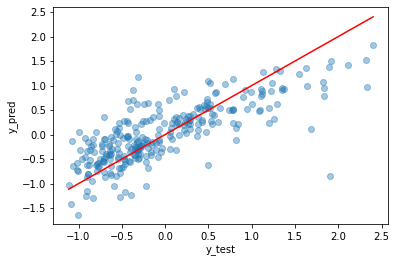

In [46]:
y_predict = m_reg.predict(x_test)
plt.scatter(y_test,y_predict, alpha=0.4)
line = np.linspace(min(y_test), max(y_test), 1000)
plt.plot(line, line, color = 'r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [47]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test,y_predict)))
print('R2 score : {0:.3f}'.format(m_reg.score(x_train, y_train)))

MSE : 0.236, RMSE : 0.486
Variance score : 0.582
R2 score : 0.763


### Performance Evaluation of each variation

X_4
 - MSE : 0.235, RMSE : 0.484
 - Variance score : 0.670
 - R2 score : 0.722
 
X_2
 - MSE : 0.236, RMSE : 0.486
 - Variance score : 0.582
 - R2 score : 0.763
 
X
 - MSE : 0.466, RMSE : 0.683
 - Variance score : 0.117
 - R2 score : 0.114

In [48]:
import statsmodels.api as sm 
X1 = sm.add_constant(x_train)
reg = sm.OLS(y_train, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               a_Silica   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     8.750
Date:                Mon, 20 Jul 2020   Prob (F-statistic):           7.59e-10
Time:                        09:29:16   Log-Likelihood:                -19.763
No. Observations:                  68   AIC:                             77.53
Df Residuals:                      49   BIC:                             119.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0382      0.053      0.723      0.473      -0.068       0.144
Starch_Flow         -0.1153      0.129     -0.892      0.377      -0.375       0.145
Anima_Flow          -0.0175      0.153     -0.114      0.909      -0.326       0.291
Ore_Pulp_Flow        0.1490      0.112      1.331      0.189      -0.076       0.374
Ore_Pulp_pH          0.0379      0.083      0.454      0.652      -0.130       0.206
Ore_Pulp_Density     0.1977      0.141      1.402      0.167      -0.086       0.481
air_2               -0.2354      0.075     -3.155      0.003      -0.385      -0.085
air_4                0.1259      0.131      0.964      0.340      -0.137       0.389
air_5                0.1227      0.118      1.038      0.304      -0.115       0.360
air_6                0.4484      0.293      1.528      0.133      -0.141       1.038
air_7               -0.4406      0.318     -1.387      0.172      -1.079       0.198
froth_1             -0.1196      0.326     -0.366      0.716      -0.776       0.536
froth_2              0.0792      0.272      0.292      0.772      -0.466       0.625
froth_3             -0.1256      0.241     -0.522      0.604      -0.610       0.358
froth_4              0.0905      0.225      0.402      0.689      -0.361       0.542
froth_5             -0.0848      0.166     -0.511      0.612      -0.418       0.249
froth_6              0.2585      0.210      1.232      0.224      -0.163       0.680
froth_7             -0.3105      0.261     -1.189      0.240      -0.835       0.214
a_Iron              -0.6378      0.096     -6.630      0.000      -0.831      -0.444
==============================================================================
Omnibus:                        2.455   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.386
Skew:                           0.438   Prob(JB):                        0.303
Kurtosis:                       2.726   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Random Forest

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# train data는 fit_transform 스케일링
X_train = sc.fit_transform(x_train)

# test data는 transform으로 스케일링
X_test = sc.transform(x_test)

In [50]:
np.set_printoptions(suppress=True, precision=True)
X_train

array([[ 1.3,  0.1,  0.4, ...,  0.9,  1.2,  1.8],
       [ 0.9,  1.2,  0.5, ..., -0.8, -0.7,  0.1],
       [ 1. ,  0.4,  0.5, ...,  0.9,  1.1,  1.1],
       ...,
       [-0.7, -0.8,  0.4, ..., -0.5, -1. , -0.1],
       [-0.1,  1.2,  0.4, ..., -0.4, -0.3,  0.1],
       [ 0.6,  2. ,  1.3, ..., -0. ,  0.5, -1.2]])

In [51]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators=80, oob_score=True, max_features=7, \
                                  criterion='mse', max_depth=5, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
print(f'Random forest feature importances: {rfr.feature_importances_}')

Random forest feature importances: [0.  0.1 0.  0.  0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4]


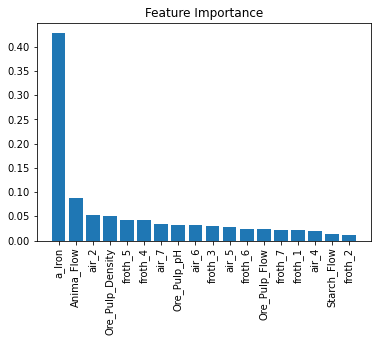

In [53]:
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [df.columns[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X_2.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X_2.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(rfr)
plt.show()

In [54]:
rfr.oob_score_

0.5160762756783623

In [55]:
print(rfr.score(X_test,y_test))

0.5351528924573855


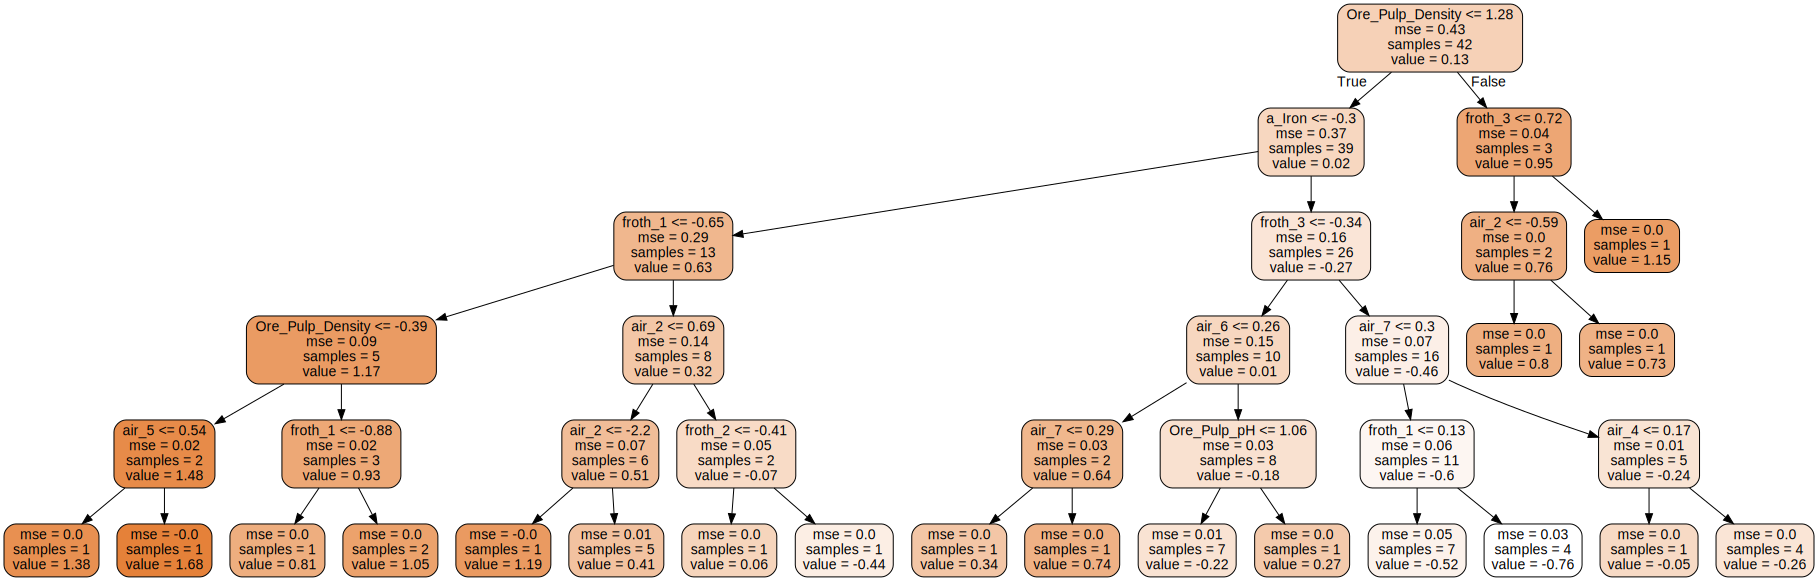

In [58]:
estimator = rfr.estimators_[50]

from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = X_2.columns.tolist(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [59]:
n_nodes = []
max_depths = []

for ind_tree in rfr.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 39
Average maximum depth 5


In [60]:
from sklearn import metrics

y_pred = rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3951707707502562
Mean Squared Error: 0.26282009456174743
Root Mean Squared Error: 0.5126598234324077


C:\Users\hhhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


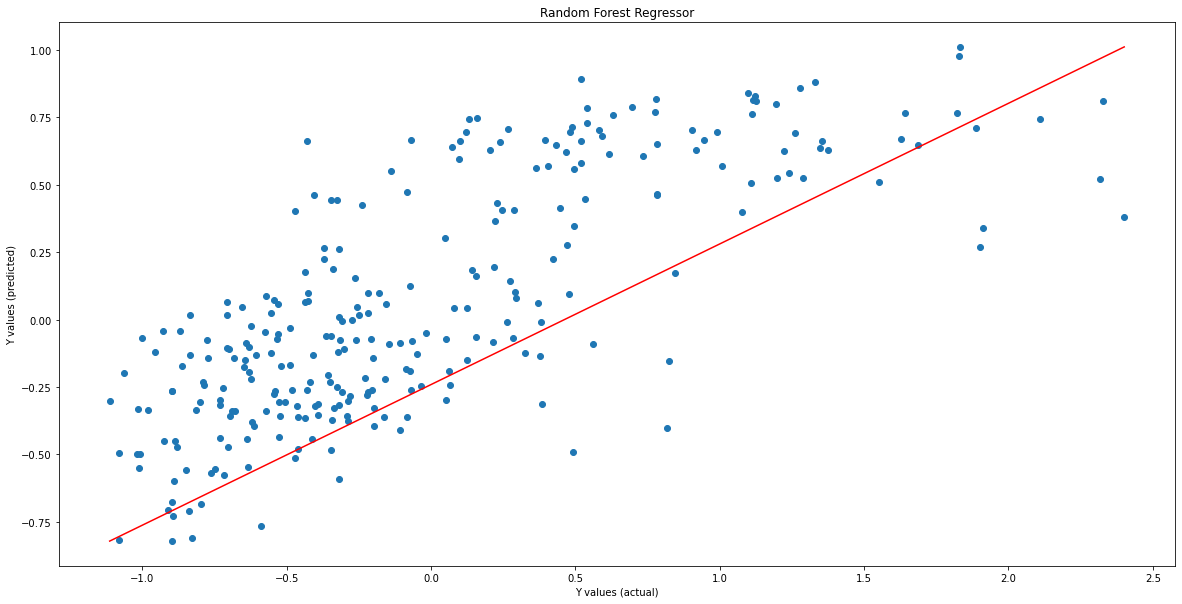

In [61]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="Random Forest Regressor", xlabel="Y values (actual)", ylabel="Y values (predicted)")
ax.scatter(y_test, rfr.predict(X_test))
ax.plot([min(y_test),max(y_test)], [min(rfr.predict(X_test)),max(rfr.predict(X_test))], color='r')
fig.show()

### Gradient Boosting

In [62]:
from sklearn.model_selection import GridSearchCV

# n_estimators: tree 갯수, max_features: random feature 수, 
# max_depth: tree의 가지수, learning rate: train set에 overfitting 방지용

gbr = GradientBoostingRegressor(random_state=42)

param_grid = [{'n_estimators': range(50, 100, 10), 
              'max_depth': range(10, 15), 'learning_rate': np.linspace(0.1, 1, 10)}]

gsr = GridSearchCV(estimator=gbr, param_grid=param_grid,  cv=5, verbose=1, n_jobs=-1)

gsr.fit(x_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   18.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [63]:
best_gsr_estimator = gsr.best_estimator_
best_gsr_estimator

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Find the best parameters

In [64]:
gsr.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}

In [65]:
# Optimal parameters defined on a separate script by iterations
params = {
    'n_estimators': 50,
    'max_depth': 10,
    'learning_rate': 0.1,
    'criterion': 'mse'
    }

# GBR implementation
gbr = ensemble.GradientBoostingRegressor(**params)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

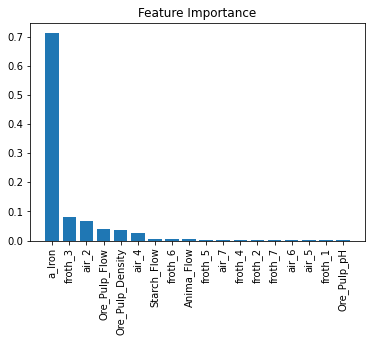

In [66]:
def plot_feature_importances(model):
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [df.columns[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X_2.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X_2.shape[1]), names, rotation=90)

    # Show plot
    plt.show()

plot_feature_importances(gbr)
plt.show()

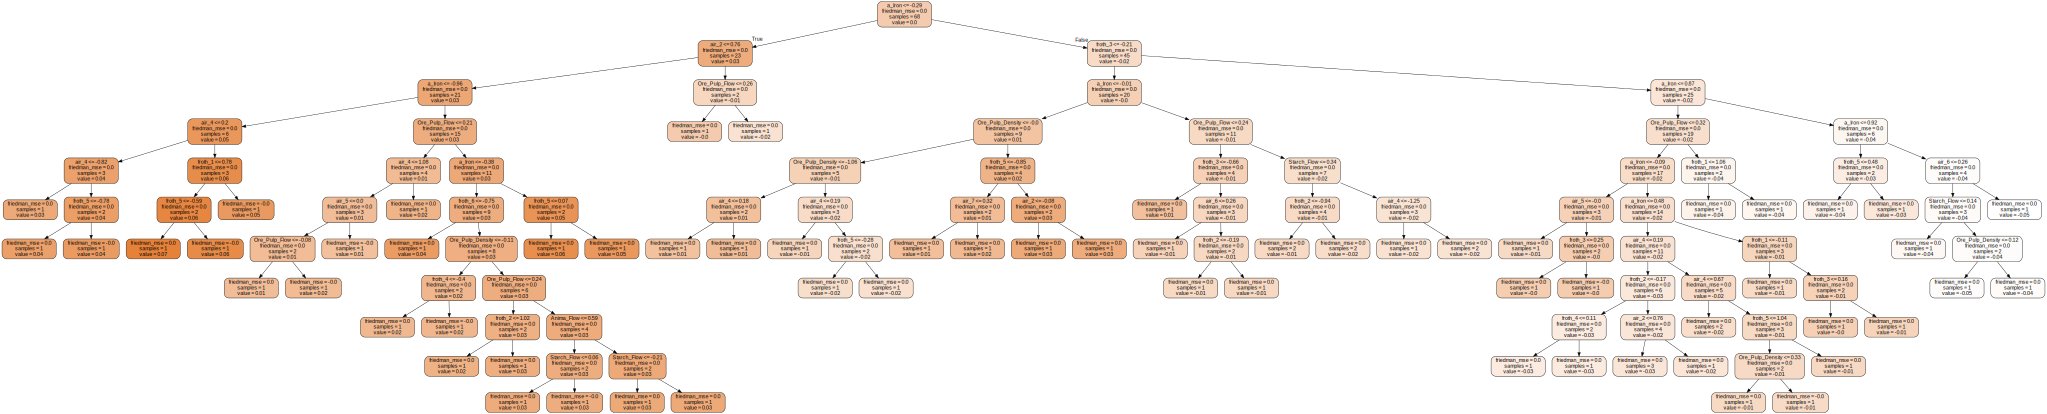

In [67]:
estimator = best_gsr_estimator.estimators_[30][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                feature_names = X_2.columns.tolist(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = graphviz.Source(dot_data)  
graph

In [68]:
from sklearn import metrics

y_pred = gbr.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.433864460267498
Mean Squared Error: 0.3191590734703104
Root Mean Squared Error: 0.5649416549258077


C:\Users\hhhwa\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


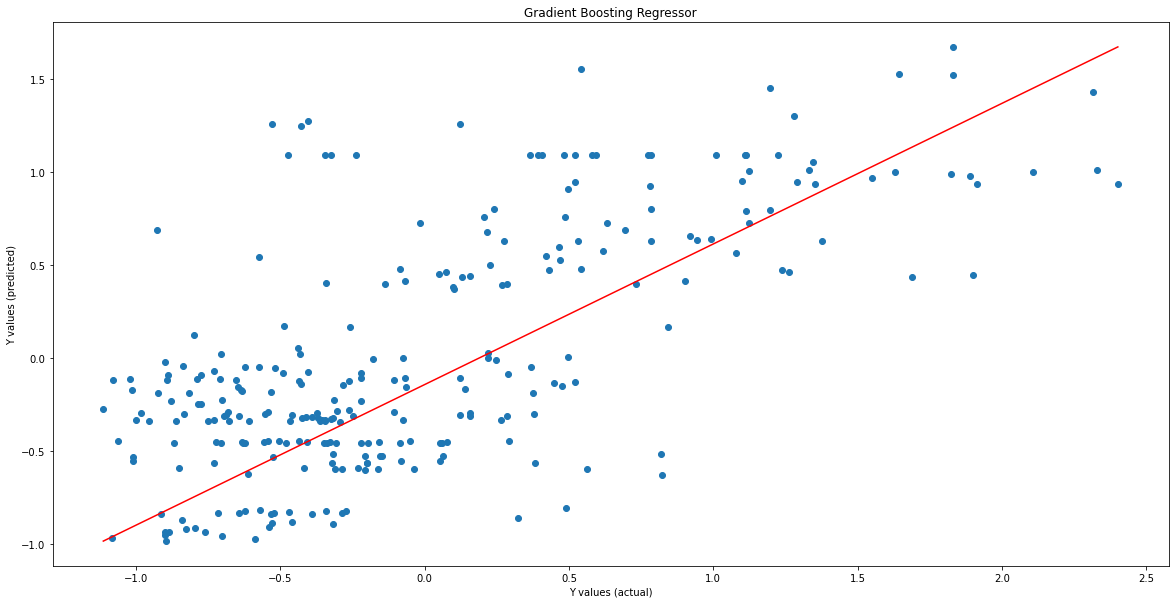

In [69]:
# GBR performance 
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="Gradient Boosting Regressor", xlabel="Y values (actual)", ylabel="Y values (predicted)")
ax.scatter(y_test, gbr.predict(x_test))
ax.plot([min(y_test),max(y_test)], [min(gbr.predict(x_test)),max(gbr.predict(x_test))], color='r')
fig.show()